<a href="https://colab.research.google.com/github/loisll/MMAI984/blob/main/lois_Team_Project_VQA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision transformers

In [1]:
# Import libraries
import pandas as pd
from PIL import Image
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from google.colab import drive

In [2]:
# Define the data path
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/Colab Notebooks/'


Mounted at /content/drive


In [16]:
# Define function for loading questions and annotations

def load_data(data_file, feature):

  # Check if the file exists
  if os.path.exists(data_file):
    print("File found:", data_file)

    # Load the JSON file using the json module
    with open(data_file, 'r') as f:
        data = json.load(f)

    # Convert the JSON data to a DataFrame
    # questions = pd.DataFrame(data)

    # Flatten the JSON structure
    data = pd.json_normalize(data[feature])

    # Question preprocessing

    print("Data loaded successfully")
  else:
    print("File not found:", data_file)

  return data

Load and prepare the training dataset

In [17]:
# Load training questions

# Define the questions file
train_questions_file = os.path.join(data_path, 'train2015/MultipleChoice_abstract_v002_train2015_questions.json')
#train_questions_file = os.path.join(data_path)
train_questions_feature = 'questions'

train_questions = load_data(train_questions_file, train_questions_feature )

# Check the first 5 rows
train_questions

File found: /content/drive/My Drive/Colab Notebooks/train2015/MultipleChoice_abstract_v002_train2015_questions.json
Data loaded successfully


,image_id,question,multiple_choices,question_id
0,11779,Who looks happier?,"[alive, 1, woman, purple, 2, yes, white, boy, ...",117792
1,11779,Where is the woman sitting?,"[3, no, blue, red, 1, slide, monkey bars, jump...",117790
2,11779,Where is the man sitting?,"[away, yes, blue, 1, 2, mouse, couch, no, yell...",117791
3,5536,Is this man hungry?,"[water, yellow, 4, running, blue, pouring, out...",55360
4,5536,What kind of drink is that?,"[wine, girl would fall, soda, white, yes, coke...",55361
...,...,...,...,...
59995,11695,What color is the log the little girl sitting on?,"[tan, brown, white, 1, running, red, 4, pink, ...",116950
59996,11695,Does the boy want to go on the seesaw?,"[red, no table, fetch, kicking soccer ball, ye...",116951
59997,13790,What animal is between the two men?,"[dog, 4, yellow, 1, collectors, no, red, yes, ...",137900
59998,13790,What food is by the picnic basket?,"[4, she is happy, grapes, pizza, white, becaus...",137901


In [18]:
# Load trainning annotations

# Define the annotations file
train_annotations_file = os.path.join(data_path, 'train2015/abstract_v002_train2015_annotations.json')
train_annotations_feature = 'annotations'
train_annotations = load_data(train_annotations_file, train_annotations_feature)

#print(train_annotations_file[annotations])
# Check the first 5 rows
train_annotations

File found: /content/drive/My Drive/Colab Notebooks/train2015/abstract_v002_train2015_annotations.json
Data loaded successfully


,question_type,multiple_choice_answer,answers,image_id,answer_type,question_id
0,who,man,"[{'answer': 'old person', 'answer_confidence':...",11779,other,117792
1,where is the,blanket,"[{'answer': 'on blanket', 'answer_confidence':...",11779,other,117790
2,where is the,bench,"[{'answer': 'on bench', 'answer_confidence': '...",11779,other,117791
3,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",5536,yes/no,55360
4,what kind of,soda,"[{'answer': 'water', 'answer_confidence': 'no'...",5536,other,55361
...,...,...,...,...,...,...
59995,what color is the,brown,"[{'answer': 'brown', 'answer_confidence': 'yes...",11695,other,116950
59996,does the,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",11695,yes/no,116951
59997,what animal is,cat,"[{'answer': 'cat', 'answer_confidence': 'yes',...",13790,other,137900
59998,what,watermelon,"[{'answer': 'watermelon, sandwich, burger', 'a...",13790,other,137901


In [19]:


# Load trainning captions

# Define the annotations file
train_captions_file = os.path.join(data_path, 'train2015/captions_abstract_v002_train2015.json')
train_captions_feature = 'images'
train_captions = load_data(train_captions_file, train_captions_feature)

#print(train_captions_file[annotations])
# Check the first 5 rows
train_captions

File found: /content/drive/My Drive/Colab Notebooks/train2015/captions_abstract_v002_train2015.json
Data loaded successfully


,url,file_name,image_id,width,height
0,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000000000.png,0,700,400
1,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000000001.png,1,700,400
2,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000000002.png,2,700,400
3,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000000003.png,3,700,400
4,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000000004.png,4,700,400
...,...,...,...,...,...
19995,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000019995.png,19995,700,400
19996,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000019996.png,19996,700,400
19997,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000019997.png,19997,700,400
19998,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000019998.png,19998,700,400


In [20]:

# Load trainning captions

# Define the annotations file
train_OpenEnded_file = os.path.join(data_path, 'train2015/OpenEnded_abstract_v002_train2015_questions.json')
train_OpenEnded_feature = 'questions'
train_OpenEnded = load_data(train_OpenEnded_file, train_OpenEnded_feature)

#print(train_captions_file[annotations])
# Check the first 5 rows
train_OpenEnded

File found: /content/drive/My Drive/Colab Notebooks/train2015/OpenEnded_abstract_v002_train2015_questions.json
Data loaded successfully


,question,image_id,question_id
0,Who looks happier?,11779,117792
1,Where is the woman sitting?,11779,117790
2,Where is the man sitting?,11779,117791
3,Is this man hungry?,5536,55360
4,What kind of drink is that?,5536,55361
...,...,...,...
59995,What color is the log the little girl sitting on?,11695,116950
59996,Does the boy want to go on the seesaw?,11695,116951
59997,What animal is between the two men?,13790,137900
59998,What food is by the picnic basket?,13790,137901


Number of questions: 60000
Number of answers: 60000


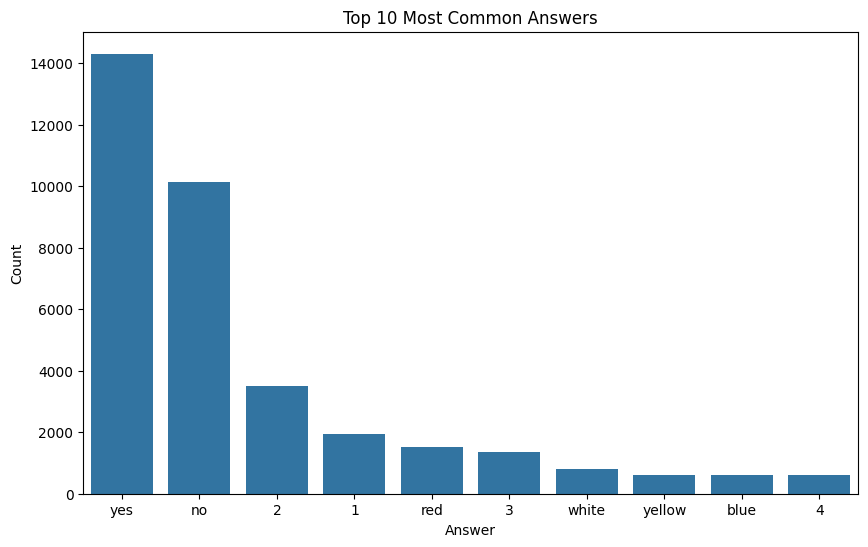

In [21]:
# Perform EDA
print("Number of questions:", len(train_questions))
print("Number of answers:", len(train_annotations))

answer_counts = train_annotations['multiple_choice_answer'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=answer_counts.index[:10], y=answer_counts.values[:10])
plt.title('Top 10 Most Common Answers')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.show()


In [22]:
# Merge questions and answers

#train_data = pd.merge(train_questions, train_annotations, on='question_id')
train_data = pd.merge(train_questions, train_annotations, on=["image_id", "question_id"])


In [23]:
train_data

,image_id,question,multiple_choices,question_id,question_type,multiple_choice_answer,answers,answer_type
0,11779,Who looks happier?,"[alive, 1, woman, purple, 2, yes, white, boy, ...",117792,who,man,"[{'answer': 'old person', 'answer_confidence':...",other
1,11779,Where is the woman sitting?,"[3, no, blue, red, 1, slide, monkey bars, jump...",117790,where is the,blanket,"[{'answer': 'on blanket', 'answer_confidence':...",other
2,11779,Where is the man sitting?,"[away, yes, blue, 1, 2, mouse, couch, no, yell...",117791,where is the,bench,"[{'answer': 'on bench', 'answer_confidence': '...",other
3,5536,Is this man hungry?,"[water, yellow, 4, running, blue, pouring, out...",55360,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
4,5536,What kind of drink is that?,"[wine, girl would fall, soda, white, yes, coke...",55361,what kind of,soda,"[{'answer': 'water', 'answer_confidence': 'no'...",other
...,...,...,...,...,...,...,...,...
59995,11695,What color is the log the little girl sitting on?,"[tan, brown, white, 1, running, red, 4, pink, ...",116950,what color is the,brown,"[{'answer': 'brown', 'answer_confidence': 'yes...",other
59996,11695,Does the boy want to go on the seesaw?,"[red, no table, fetch, kicking soccer ball, ye...",116951,does the,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
59997,13790,What animal is between the two men?,"[dog, 4, yellow, 1, collectors, no, red, yes, ...",137900,what animal is,cat,"[{'answer': 'cat', 'answer_confidence': 'yes',...",other
59998,13790,What food is by the picnic basket?,"[4, she is happy, grapes, pizza, white, becaus...",137901,what,watermelon,"[{'answer': 'watermelon, sandwich, burger', 'a...",other


In [ ]:
# Question preprocessing
"""
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# question = "What is happening in the picture?"
tokenized_question = tokenizer(questions, return_tensors="pt", padding="max_length", truncation=True, max_length=20)
"""

'\nfrom transformers import BertTokenizer\n\ntokenizer = BertTokenizer.from_pretrained(\'bert-base-uncased\')\n# question = "What is happening in the picture?"\ntokenized_question = tokenizer(questions, return_tensors="pt", padding="max_length", truncation=True, max_length=20)\n'

In [24]:
# Answer preprocessing

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_answers = label_encoder.fit_transform(train_annotations['multiple_choice_answer'])


In [13]:
# Extract images from .zip

"""
# Define the images file
images_file = os.path.join(data_path, 'abstract_v002_train2015_000000000000.png')
image = Image.open(images_file)
image.show()
"""

# Define the images zip file
images_file = os.path.join(data_path, 'train2015/scene_img_abstract_v002_train2015.zip')

# Define the path to your zip file and the extraction destination
extract_dir = os.path.join(data_path, 'train2015/train2015_images/')

# Unzip the file
with zipfile.ZipFile(images_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted all images to {extract_dir}")


Extracted all images to /content/drive/My Drive/Colab Notebooks/train2015/train2015_images/


In [14]:
# Load images and preprocess in batches

import torchvision.transforms as transforms

# Get a list of all image files
image_files = [f for f in os.listdir(extract_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

batch_size = 100  # Define your batch size
num_batches = len(image_files) // batch_size

# for batch_idx in range(num_batches + 1):
for batch_idx in range(2):
    start_idx = batch_idx * batch_size
    end_idx = start_idx + batch_size
    batch_files = image_files[start_idx:end_idx]

    # Process each image in the batch
    for image_file in batch_files:
        image_path = os.path.join(extract_dir, image_file)
        image = Image.open(image_path)

        # print("Image size:", image.size)

        # Define the transformation
        transform = transforms.Compose([
            transforms.Resize((224, 224)),  # Resizing to match model input size
            transforms.ToTensor(),          # Convert to tensor
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalization
        ])

        # Ensure the image is in RGB mode (3 channels)
        if image.mode != 'RGB':
            image = image.convert('RGB')

        # Apply transformation to image
        image_tensor = transform(image).unsqueeze(0)

        # print("Tensor shape after transform:", image_tensor.shape)

        # Close image after processing
        image.close()

    print(f"Processed batch {batch_idx + 1}/{num_batches + 1}")


Processed batch 1/201
Processed batch 2/201


Load and prepare the validation dataset

In [ ]:
# Load validation questions

# Define the questions file
val_questions_file = os.path.join(data_path, 'val2015/MultipleChoice_abstract_v002_val2015_questions.json')
val_questions_feature = 'questions'

val_questions = load_data(val_questions_file, val_questions_feature )

# Check the first 5 rows
val_questions.head(5)

File found: /content/drive/My Drive/MMAI2025-894-Deep Learning/Team Project-VQA/abstract_v002/val2015/MultipleChoice_abstract_v002_val2015_questions.json
Data loaded successfully


,image_id,question,multiple_choices,question_id
0,27578,Is the dog asleep?,"[white, picnicking, yes, hot, dog and girl, bl...",275780
1,27578,What is the man looking at?,"[monkey bars, drinking, dog, red, blue, son, b...",275781
2,27578,Is the man sitting on the armrest?,"[2, brown, wider, sitting, yes, marriage, red,...",275782
3,21768,Did she bake the pie?,"[golden girls, sky, 1, blue, 2, 4, no, feeding...",217680
4,21768,What is resting on the table besides the pie?,"[brown, air, cumulus, no, it is playing, wine ...",217681


In [ ]:
# Load validation annotations

# Define the annotations file
val_annotations_file = os.path.join(data_path, 'val2015/abstract_v002_val2015_annotations.json')
val_annotations_feature = 'annotations'
val_annotations = load_data(val_annotations_file, val_annotations_feature)

# Check the first 5 rows
val_annotations.head(5)

File found: /content/drive/My Drive/MMAI2025-894-Deep Learning/Team Project-VQA/abstract_v002/val2015/abstract_v002_val2015_annotations.json
Data loaded successfully


,question_type,multiple_choice_answer,answers,image_id,answer_type,question_id
0,is the dog,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",27578,yes/no,275780
1,what is the man,tv,"[{'answer': 'tv', 'answer_confidence': 'yes', ...",27578,other,275781
2,is the man,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",27578,yes/no,275782
3,none of the above,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",21768,yes/no,217680
4,what is,wine glass,"[{'answer': 'wine glass', 'answer_confidence':...",21768,other,217681


In [ ]:
# Define VQA Model architecture

import tensorflow as tf
from tensorflow import keras
from keras.src.models.model import Model
from keras.src.layers.rnn.lstm import LSTM
from keras.src.layers.reshaping.flatten import Flatten
from keras.src.layers.pooling.max_pooling2d import MaxPooling2D
from keras.src.layers.merging.concatenate import Concatenate
from keras.src.layers.core.input_layer import Input
from keras.src.layers.core.embedding import Embedding
from keras.src.layers.core.dense import Dense
from keras.src.layers.convolutional.conv2d import Conv2D

# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten Embedding, LSTM, Dense, Concatenate

# Image model
image_input = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
image_model = Model(inputs=image_input, outputs=x)

# Question model
question_input = Input(shape=(None,))
y = Embedding(input_dim=10000, output_dim=256)(question_input)
y = LSTM(256)(y)
question_model = Model(inputs=question_input, outputs=y)

# Combine models
combined = Concatenate()([image_model.output, question_model.output])
z = Dense(256, activation='relu')(combined)
z = Dense(1000, activation='softmax')(z)

vqa_model = Model(inputs=[image_model.input, question_model.input], outputs=z)
vqa_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the Model

# image_data, question_data, and labels

vqa_model.fit([image_data, question_data], labels, epochs=10, batch_size=32, validation_data=([val_image_data, val_question_data], val_labels))



In [ ]:
# Evaluate the Model
loss, accuracy = vqa_model.evaluate([val_image_data, val_question_data], val_labels)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')
